In [56]:
class Information:
  def __init__(self, con, num, armGNIn, armType, onlyInter, masking, outcomPri, outcomeSec, allo, timePri, timeSec):
    self.condition = con
    self.enrollment = num
    self.armGroupNIntervnetion = armGNIn
    self.armType = armType
    self.onlyInterventionName = onlyInter
    self.masking = masking
    self.outcomePri = outcomPri
    self.outcomeSec = outcomeSec
    self.allocation = allo
    self.timeFramePri = timePri
    self.timeFrameSec = timeSec

In [68]:
import requests

## data extraction
def get_info(url):
  response = requests.get(url).json()

  condition = ""
  enrollment = 0
  armGroupNIntervnetion = {}
  armType = []
  onlyInterventionName = []
  masking = "none"
  outcomePri = []
  outcomeSec = []
  allocation = "R/nonR"
  timeFramePri = []
  timeFrameSec = []

  protocolSection = response['FullStudiesResponse']['FullStudies'][0]['Study']['ProtocolSection']

  #condition
  condition = protocolSection['ConditionsModule']['ConditionList']['Condition']

  #enrollment
  enrollment = protocolSection['DesignModule']['EnrollmentInfo']['EnrollmentCount']

  #Allocation
  allocation = protocolSection['DesignModule']['DesignInfo']['DesignAllocation']

  # outcome primary
  for i in range(len(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'])):
    outcomePri.append(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'][i]['PrimaryOutcomeMeasure'])

  # outcome secondary
  for i in range(len(protocolSection['OutcomesModule']['SecondaryOutcomeList']['SecondaryOutcome'])):
    outcomeSec.append(protocolSection['OutcomesModule']['SecondaryOutcomeList']['SecondaryOutcome'][i]['SecondaryOutcomeMeasure'])

  #armGroupName
  for i in range(len(protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'])):
    armLabel = protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'][i]['ArmGroupLabel']
    armIntervention = protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'][i]['ArmGroupInterventionList']['ArmGroupInterventionName']
    armGroupNIntervnetion[armLabel] = armIntervention

  #armType
  for i in range(len(protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'])):
    armt = protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'][i]['ArmGroupType']
    armType.append(armt)

  #interventionName
  for i in range(len(protocolSection['ArmsInterventionsModule']['InterventionList']['Intervention'])):
    onlyInterventionName.append(protocolSection['ArmsInterventionsModule']['InterventionList']['Intervention'][i]['InterventionName'])

  #masking
  masking = protocolSection['DesignModule']['DesignInfo']['DesignMaskingInfo']['DesignMasking']

  #timeFramePri
  for i in range(len(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'])):
    timeFramePri.append(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'][i]['PrimaryOutcomeTimeFrame'])

  #timeFrameSec
  for i in range(len(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'])):
    timeFrameSec.append(protocolSection['OutcomesModule']['SecondaryOutcomeList']['SecondaryOutcome'][i]['SecondaryOutcomeTimeFrame'])

  return Information(condition, enrollment, armGroupNIntervnetion, armType, onlyInterventionName, masking, outcomePri, outcomeSec, allocation, timeFramePri, timeFrameSec)

In [58]:
# 좌표 class
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [40]:
## 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [92]:
def visualization(info):
  ##initialize
  condition = info.condition
  enrollment = info.enrollment
  armGroupNIntervnetion = info.armGroupNIntervnetion
  armType = info.armType
  onlyInterventionName = info.onlyInterventionName
  masking = info.masking
  outcomePri =info.outcomePri
  outcomeSec = info.outcomeSec
  allocation = info.allocation
  timeFramePri = info.timeFramePri
  timeFrameSec = info.timeFrameSec


  plt.style.use('default') #스타일 설정: https://hong-yp-ml-records.tistory.com/88
  plt.rcParams['figure.figsize'] = (20, 15) # 차트의 기본 크기 설정
  plt.rcParams['font.size'] = 10.5 # fontsize

  fig, ax = plt.subplots()
  ax.plot() # 0번: x값, #1번: y값

  #box1 style
  box1 = {'boxstyle': 'round', 
          'ec': (1.0, 0.5, 0.5), # ec: edgeColor, fc: faceColor
          'fc': (1.0, 0.8, 0.8)}

  #population
  ######point######## 초기화
  startPoint = Point(10, 10) 
  startW = 4
  startH = 4
  ###################
  ax.add_patch(
      patches.Rectangle(
        (startPoint.x, startPoint.y), # bottom and left rect
          startW, #너비
          startH, #높이
          edgecolor = 'blue',
          # facecolor = 'red',
          fill = False
      )
  )
  ax.text(startPoint.x+startW/2 -1, startPoint.y+startH, 'Population', bbox = box1)
  for i in range(len(condition)):
    ax.text(startPoint.x + 0.3, startPoint.y+startH - 0.5 -i*0.3, str(condition[i]))

  # Number, Masking
  ######point########
  NumberPoint = Point(startPoint.x+startW, startPoint.y + startH/2) 
  numberW = 2
  ###################
  ax.add_patch(
      patches.Arrow(
          NumberPoint.x, NumberPoint.y, numberW, 0, width=0.5 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
      )
  )
  ax.text(NumberPoint.x+0.3, NumberPoint.y+0.3, 'N='+str(enrollment))
  ax.text(NumberPoint.x+0.3, NumberPoint.y-0.3, 'M='+str(masking)) 

  # allocation
  ######point########
  radius = 0.5
  allocationPoint = Point(NumberPoint.x+numberW+radius, NumberPoint.y) 
  ###################
  ax.add_patch(
      patches.Circle(
          (allocationPoint.x, allocationPoint.y), radius
      )
  )
  ax.text(allocationPoint.x-0.1, allocationPoint.y, str(allocation)[0])

  #branch
  ######point########
  armGLinePoint1 = Point(allocationPoint.x + radius, allocationPoint.y) 
  armGW = 1
  armGArrowW = 7
  ###################
  colorBranch = ['lightcoral', 'gold', 'limegreen', 'forestgreen', 'cornflowerblue', 'royalblue', 'violet', 'pink']
  fontArm = {'size': 9}
  lenBranch = len(armGroupNIntervnetion)
  armGroup = list(armGroupNIntervnetion.items())
  for i in range(lenBranch):
    color = 'b'
    if(armType[i] == 'Experimental'):
      color = colorBranch[0]
    elif('Active Comparator'):
      color = colorBranch[1]
    elif('No Intervention'):
      color = colorBranch[2]
    else:
      color = 'cornflowerblue'
    ax.plot([armGLinePoint1.x,armGLinePoint1.x+armGW], [armGLinePoint1.y, startPoint.y+startH-i*((startH+1)/lenBranch)], color) ## startH를 넘을 경우도 고려해야됨. 나중에 수정.
    ax.add_patch(
        patches.Arrow(
          armGLinePoint1.x+armGW, startPoint.y+startH-i*((startH+1)/lenBranch), armGArrowW, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
          , edgecolor = color, facecolor = color
      )
    )
    armGName = str(armGroup[i][0])
    armGInter = str(armGroup[i][1])
    ax.text(armGLinePoint1.x+armGW + 0.1 , startPoint.y+startH-i*((startH+1)/lenBranch)+0.1, armGName+": \n"+armGInter, fontdict=fontArm)
    ax.plot([armGLinePoint1.x+armGW+armGArrowW, armGLinePoint1.x+armGW*2+armGArrowW], [startPoint.y+startH-i*((startH+1)/lenBranch), 12], color)

  # time frame
  ######point########
  OutLinePoint = Point(armGLinePoint1.x+armGW*2+armGArrowW, armGLinePoint1.y) 
  outLineW = 1
  ###################
  ax.plot([OutLinePoint.x, OutLinePoint.x], [startPoint.y+startH+1, startPoint.y-1], 'b')
  ax.text(OutLinePoint.x-1, startPoint.y+startH+1+0.2, "Pri time: "+str(timeFramePri[0])) # 1빼는 이유: 글자쓸 공간 확보 ==> 기간!!

  # outcome measure
  ######point########
  outArrowPoint = Point(OutLinePoint.x+outLineW, OutLinePoint.y+ startH/4) 
  outArrowW = 1
  outArrowH = startH/2
  ###################
  for i in range(2):
    ax.plot([OutLinePoint.x, outArrowPoint.x], [OutLinePoint.y, outArrowPoint.y-i*2], 'b')
    ax.add_patch(
        patches.Arrow(
          outArrowPoint.x, outArrowPoint.y-i*2, outArrowW, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
          , edgecolor = 'blue'
      )
    )
  ax.text(outArrowPoint.x+0.1, outArrowPoint.y+0.1, 'Primary', fontdict=fontArm)
  ax.text(outArrowPoint.x+0.1, outArrowPoint.y-outArrowH+0.1, 'Secondary', fontdict=fontArm)

  # first outcome measure
  ######변수이름 이상. 매칭안됨
  ######point########
  outPriArrowPoint = Point(outArrowPoint.x+outArrowW, outArrowPoint.y) 
  outPriArrowW = 3
  lenOutPri = len(outcomePri)
  outPriArrowH = lenOutPri/ (lenOutPri+5) ###계산필요!! 수정요함
  outPriLineW = 1
  outPriBrachArrowPoint = Point(outPriArrowPoint.x+outPriLineW, outPriArrowPoint.y+outPriArrowH)
  ###################
  for i in range(lenOutPri):
    ax.plot([outPriArrowPoint.x, outPriBrachArrowPoint.x], [outPriArrowPoint.y, outPriBrachArrowPoint.y -i*outPriArrowH], 'b')
    ax.add_patch(
        patches.Arrow(
          outPriBrachArrowPoint.x, outPriBrachArrowPoint.y -i*outPriArrowH, outPriArrowW, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
          , edgecolor = 'blue'
      )
    )
    ax.text(outPriBrachArrowPoint.x+0.1, outPriBrachArrowPoint.y -i*outPriArrowH+0.1, outcomePri[i], fontdict=fontArm)

  # secondary outcome measure
  ######point########
  outSecArrowPoint = Point(outArrowPoint.x+outArrowW, OutLinePoint.y - startH/4) 
  outSecArrowW = 3
  lenOutSec = len(outcomeSec)
  outSecArrowH = lenOutSec/ (lenOutSec+5)
  outSecLineW = 1
  outSecBrachArrowPoint = Point(outSecArrowPoint.x+outSecLineW, outSecArrowPoint.y+outSecArrowH)
  ###################
  lenOutSec = len(outcomeSec)
  for i in range(lenOutSec):
    ax.plot([outSecArrowPoint.x, outSecBrachArrowPoint.x], [outSecArrowPoint.y, outSecBrachArrowPoint.y -i*outSecArrowH], 'b')
    ax.add_patch(
        patches.Arrow(
          outSecBrachArrowPoint.x, outSecBrachArrowPoint.y -i*outSecArrowH, outSecArrowW, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
          , edgecolor = 'blue'
      )
    )
    ax.text(outSecBrachArrowPoint.x + 0.1, outSecBrachArrowPoint.y -i*outSecArrowH+0.1, outcomeSec[i], fontdict=fontArm)

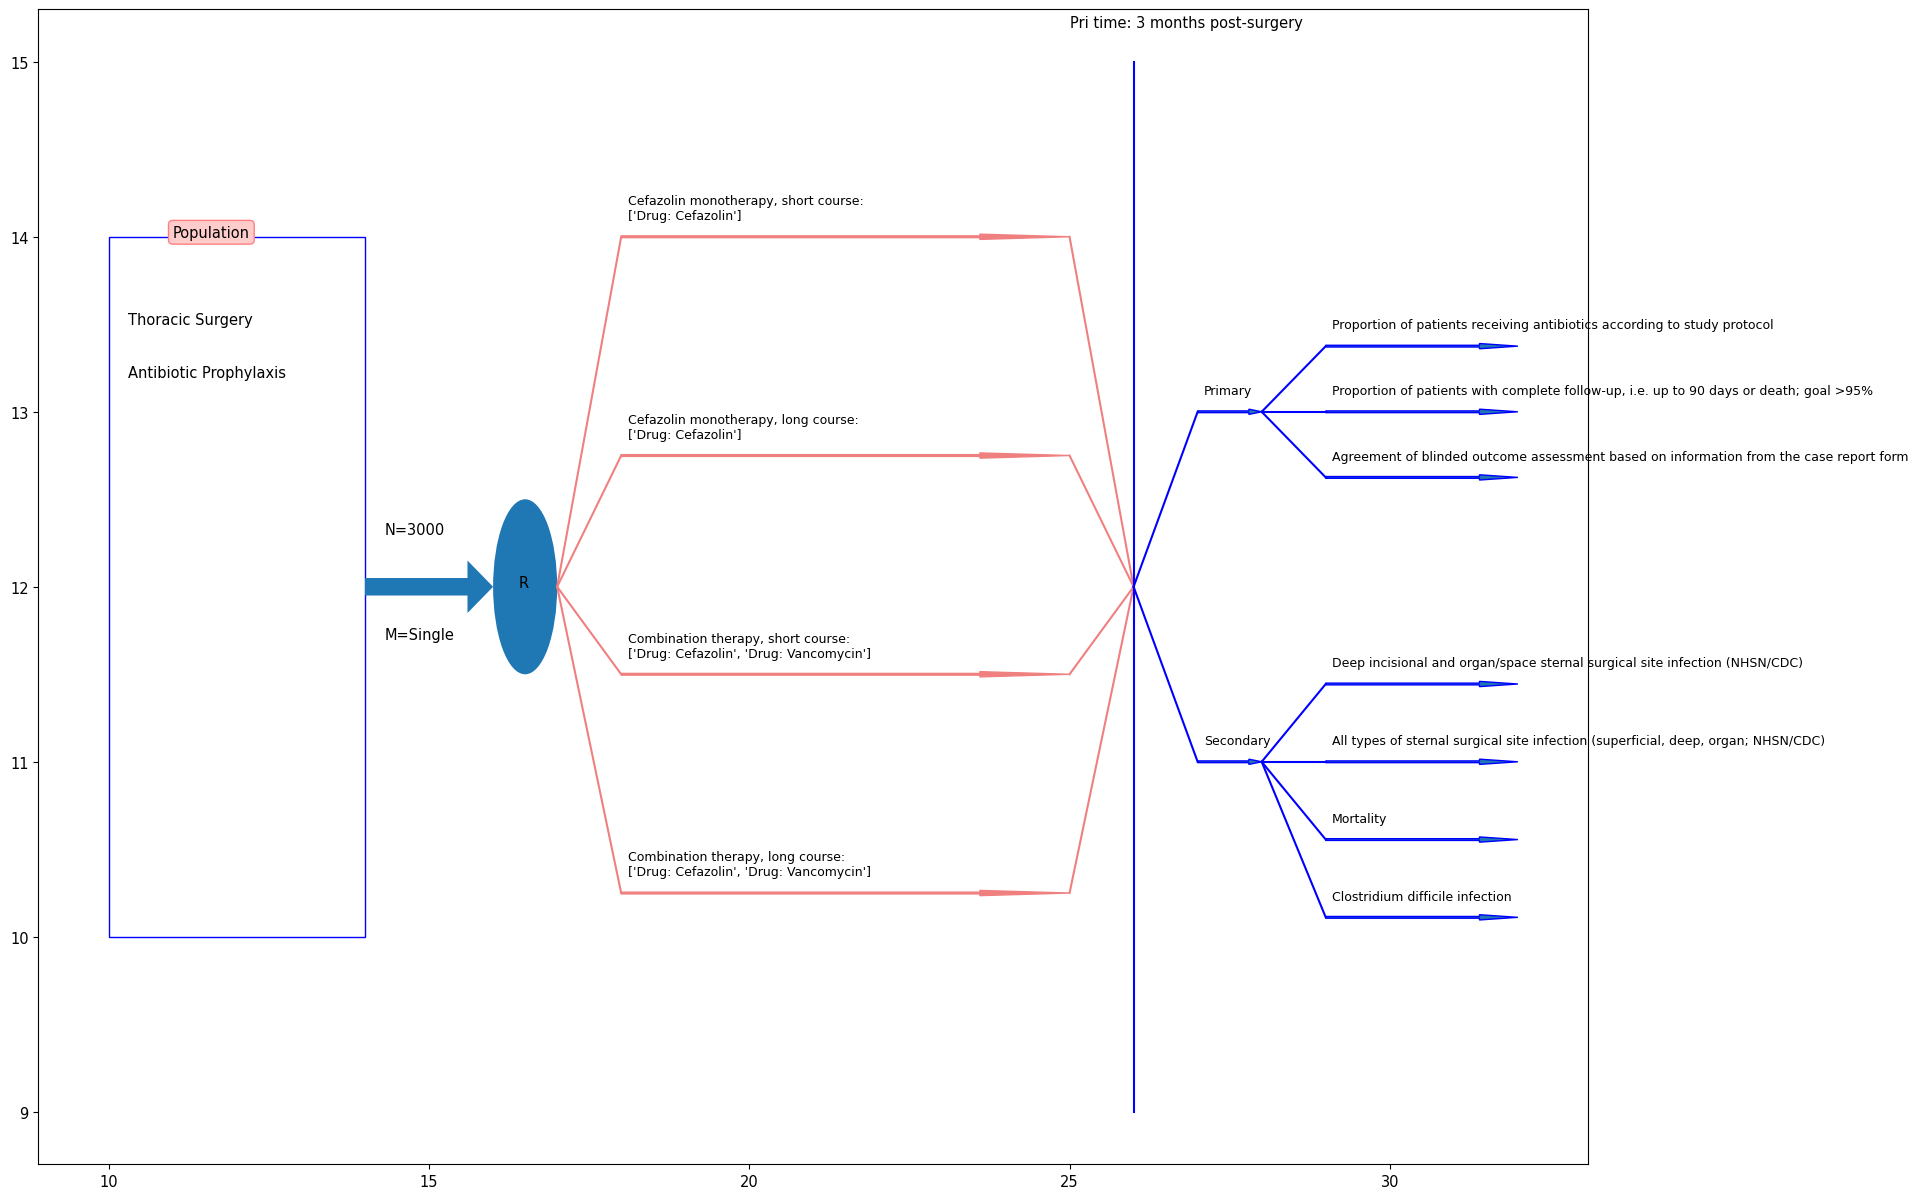

In [93]:
########### case 1
url1 = "https://clinicaltrials.gov/api/query/full_studies?expr=Prevention+of+Infections+in+Cardiac+Surgery+%28PICS%29&min_rnk=1&max_rnk=&fmt=json"
case1 = get_info(url1)
visualization(case1)

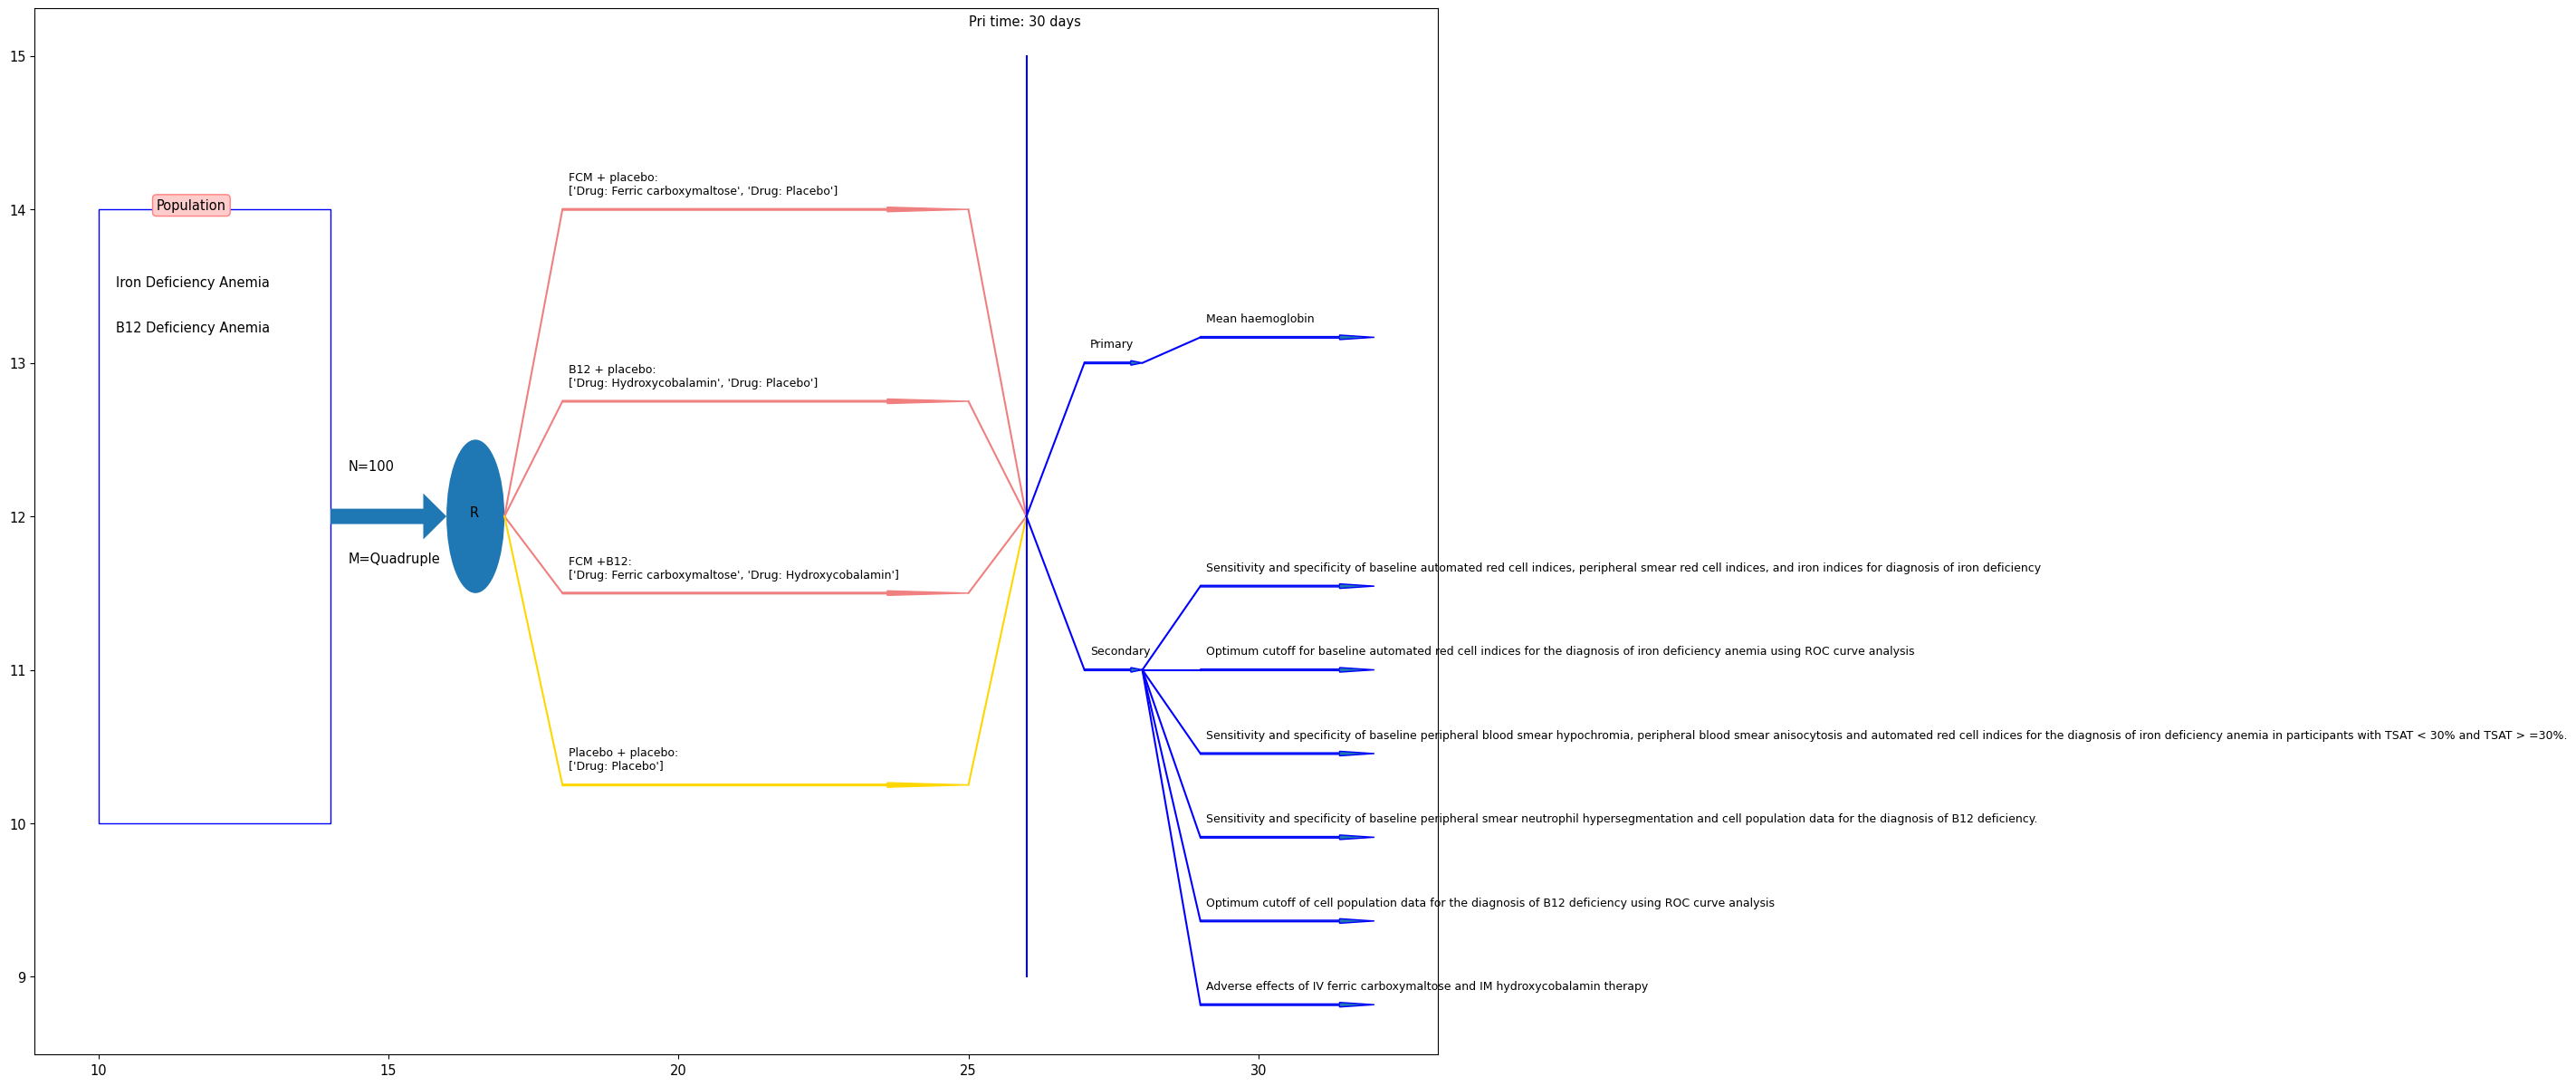

In [94]:
##################################
#case 2
url2 = 'https://www.clinicaltrials.gov/api/query/full_studies?expr=Do+Iron+And+Vitamin+B12+Injections+Given+Together&fmt=JSON'
case2 = get_info(url2)
visualization(case2)

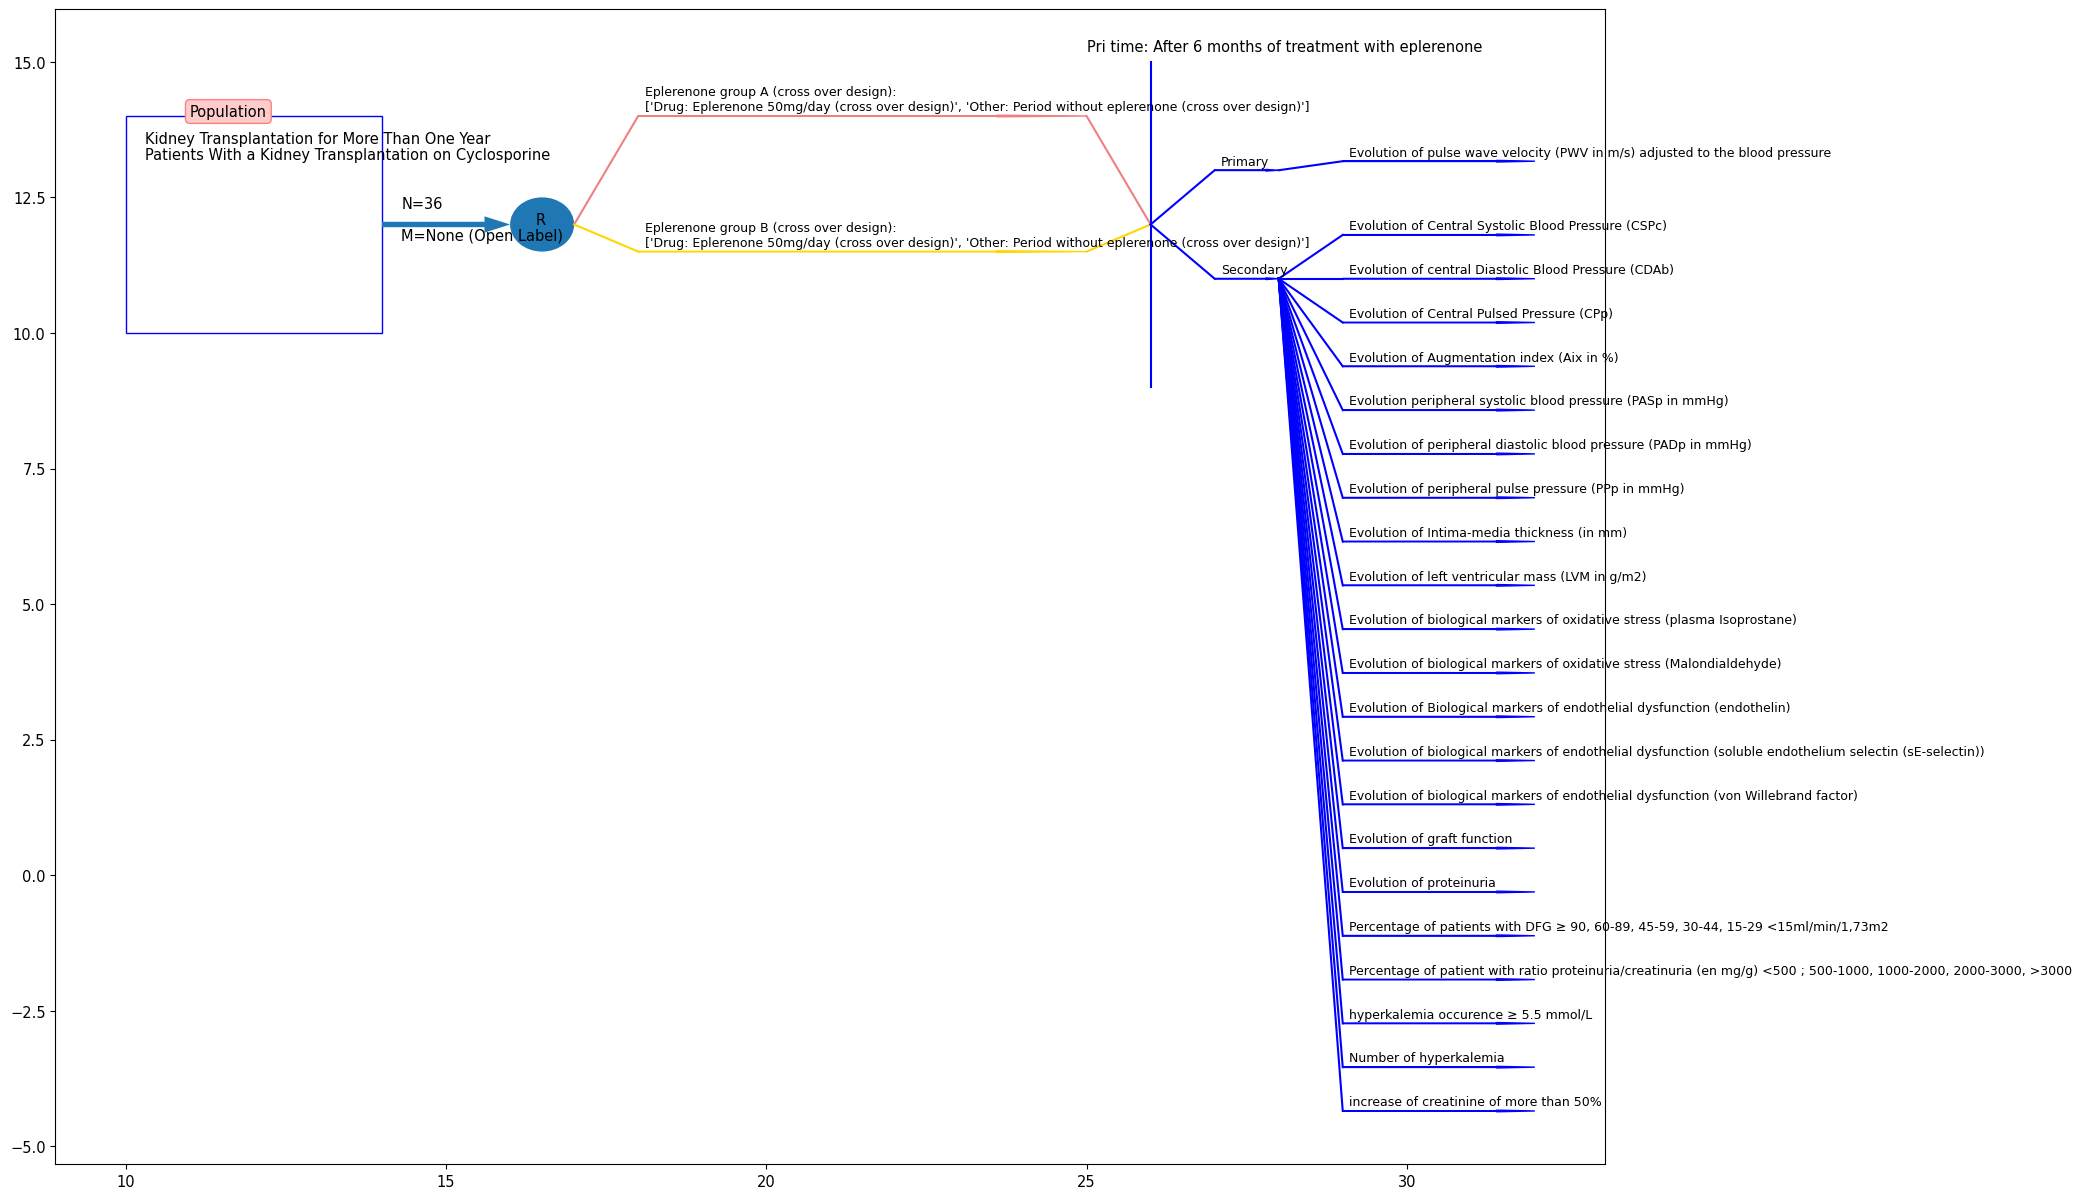

In [95]:
##################################
#case 3
url3 = 'https://www.clinicaltrials.gov/api/query/full_studies?expr=The%20Effect%20of%20Eplerenone%20on%20the%20Evolution&fmt=JSON'
case3 = get_info(url3)
visualization(case3)

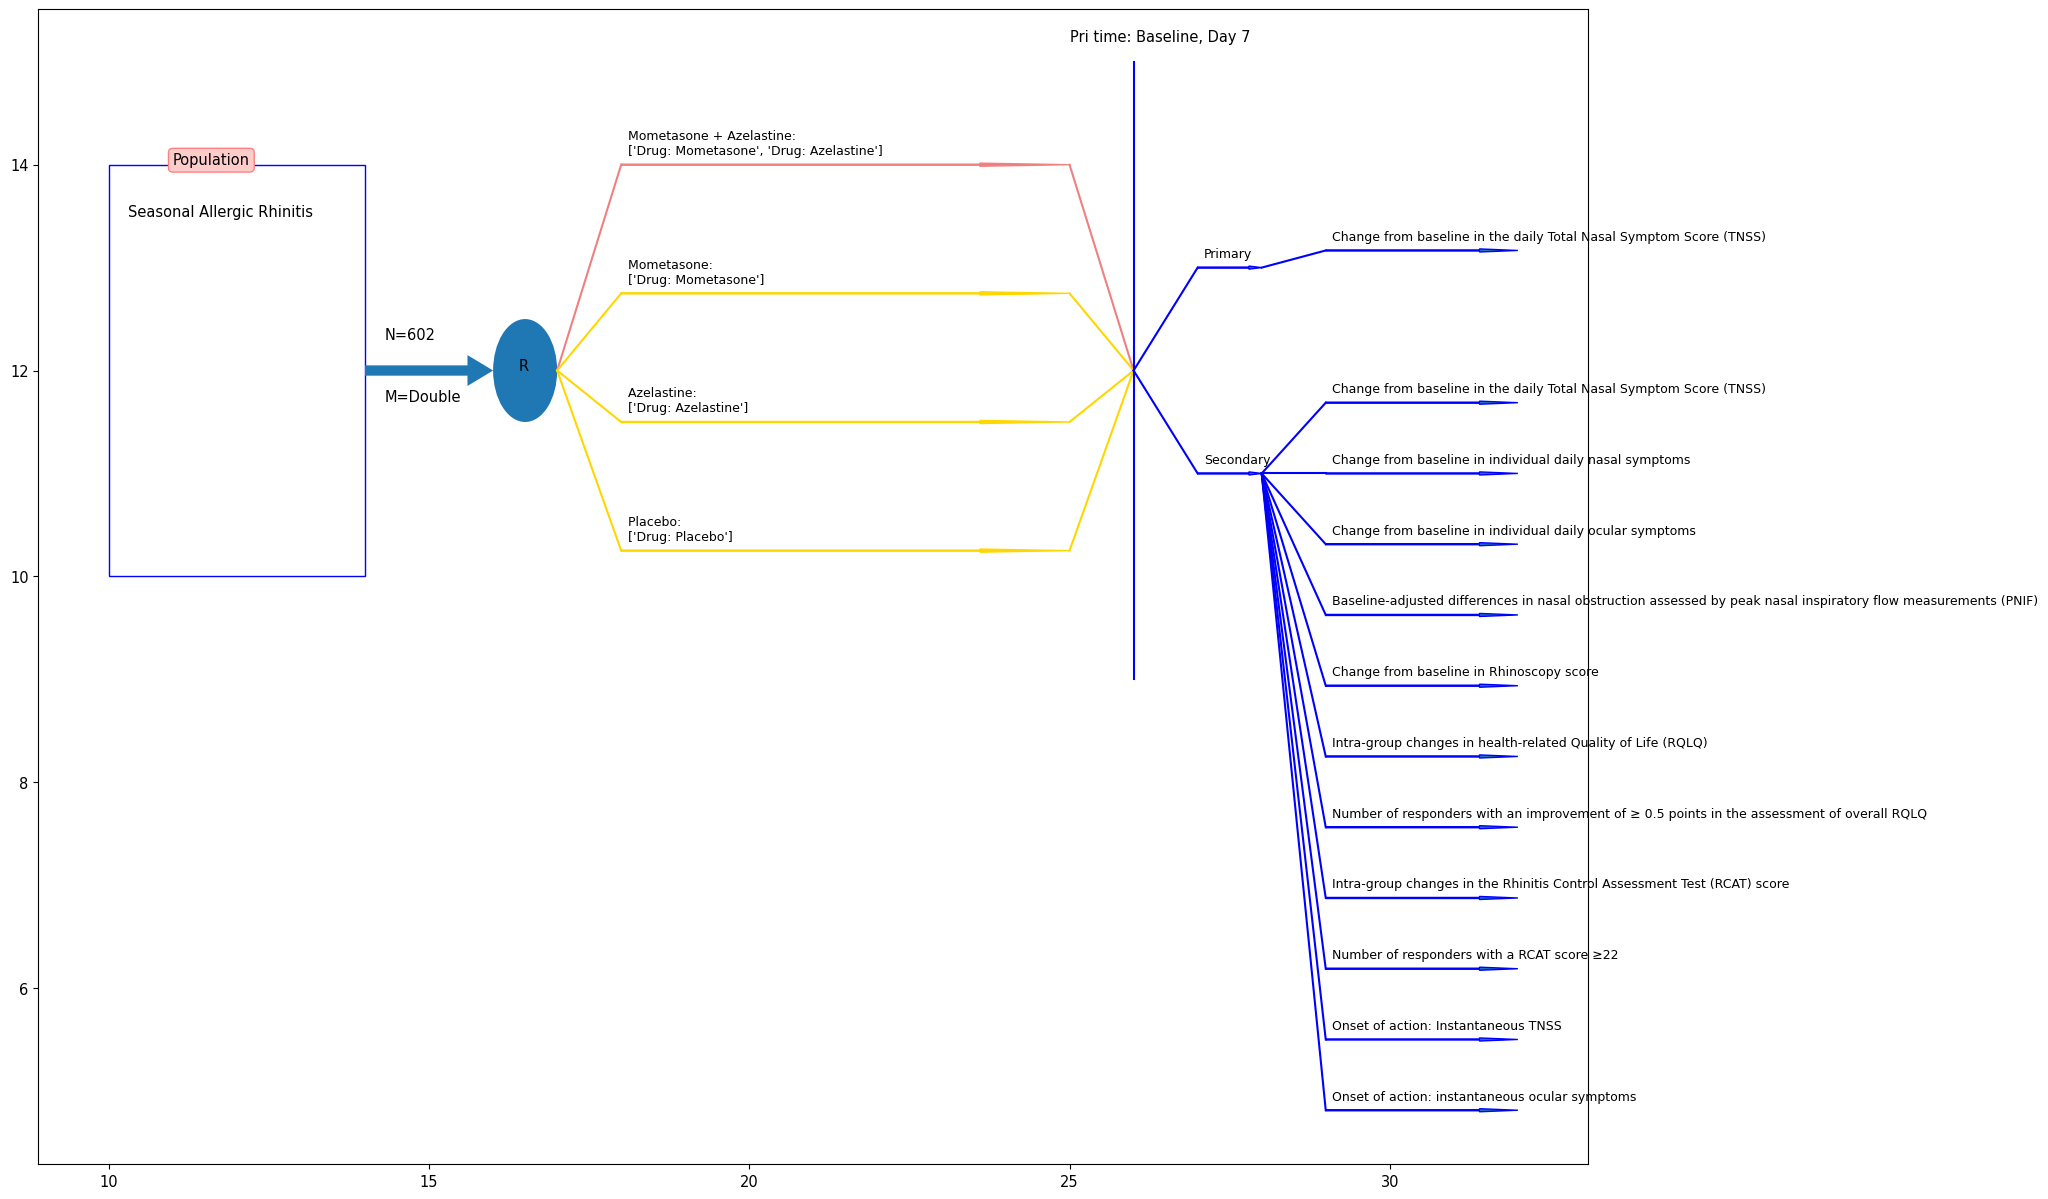

In [96]:
##################################
#case 4
url4 = 'https://www.clinicaltrials.gov/api/query/full_studies?expr=Prospective,%20Randomized,%20Multinational,%20Multicenter,%20Double-blind,%20Placebo%20and%20Active%20Controlled%20Trial%20in%204%20Parallel-groups&fmt=JSON'
case4 = get_info(url4)
visualization(case4)